<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 3: Practical - Logistic Regression <br> <br>
<font color=686880 size=4>
    TAs: Ali Salesi - Alireza Dehghanpour - Arman Malekzadeh
    
____

### Full Name : Mohammad Javad Maheronnaghsh
___

## 1. Introduction (10 points)
The datasets consist of several medical predictor(independent) variables and one target (dependent) variable, "Outcome". Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
  * Pregnancies
  * Glucose
  * BloodPressure
  * SkinThickness
  * Insulin
  * BMI
  * DiabetesPedigreeFunction
  * Age


First, we perform some data exploration to get a better understanding of the data. Then, we perform some data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv

--2023-05-04 20:09:28--  https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv [following]
--2023-05-04 20:09:28--  https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20859 (20K) [text/plain]
Saving to: ‘diabet-train.csv.2’

diabet-train.csv.2  100%[===================>]  20.37K  --.-KB/s    in 0.001s  

2023-05-04 20:09:28 (33.7 MB/s) - ‘diabet-train.csv.2’ s

TODO: Load the dataset as a dataframe. Then, check for any null values. Remove the rows containing them. Finally, display the first 10 rows.

In [3]:
df = pd.read_csv('diabet-train.csv')

In [4]:
df.isnull().values.any()

False

In [5]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

So there is no Nan value in the dataset -> there is no need to delete any value.

TODO: Calculate the mean, standard deviation, min and max value for each column.

In [6]:
for column in df:
  print(column)
  print(df[column].describe())
  print("\n******\n")

Pregnancies
count    688.000000
mean       3.818314
std        3.359206
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

******

Glucose
count    688.000000
mean     120.399709
std       32.335016
min        0.000000
25%       99.000000
50%      116.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

******

BloodPressure
count    688.000000
mean      68.816860
std       19.412061
min        0.000000
25%       62.000000
50%       71.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

******

SkinThickness
count    688.000000
mean      20.437500
std       15.998604
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

******

Insulin
count    688.000000
mean      79.325581
std      115.199903
min        0.000000
25%        0.000000
50%       36.000000
75%      126

## 2. Data Exploration (10 points)
In this section, we perform some data exploration to get a better understanding of the data.
First, we draw heatmaps to see the correlation between the features.
Then we draw pairplots to see the distribution of the features.

TODO: Draw a heatmap based on the correlation between the features (hint: you can use `seaborn`)

<Axes: >

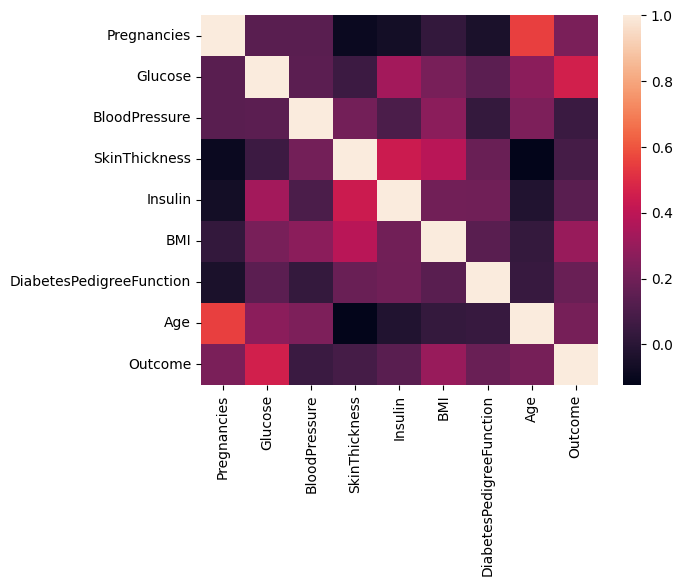

In [7]:
sns.heatmap(df.corr())

TODO: Draw the pairplot associated with the dataframe using `seaborn`.

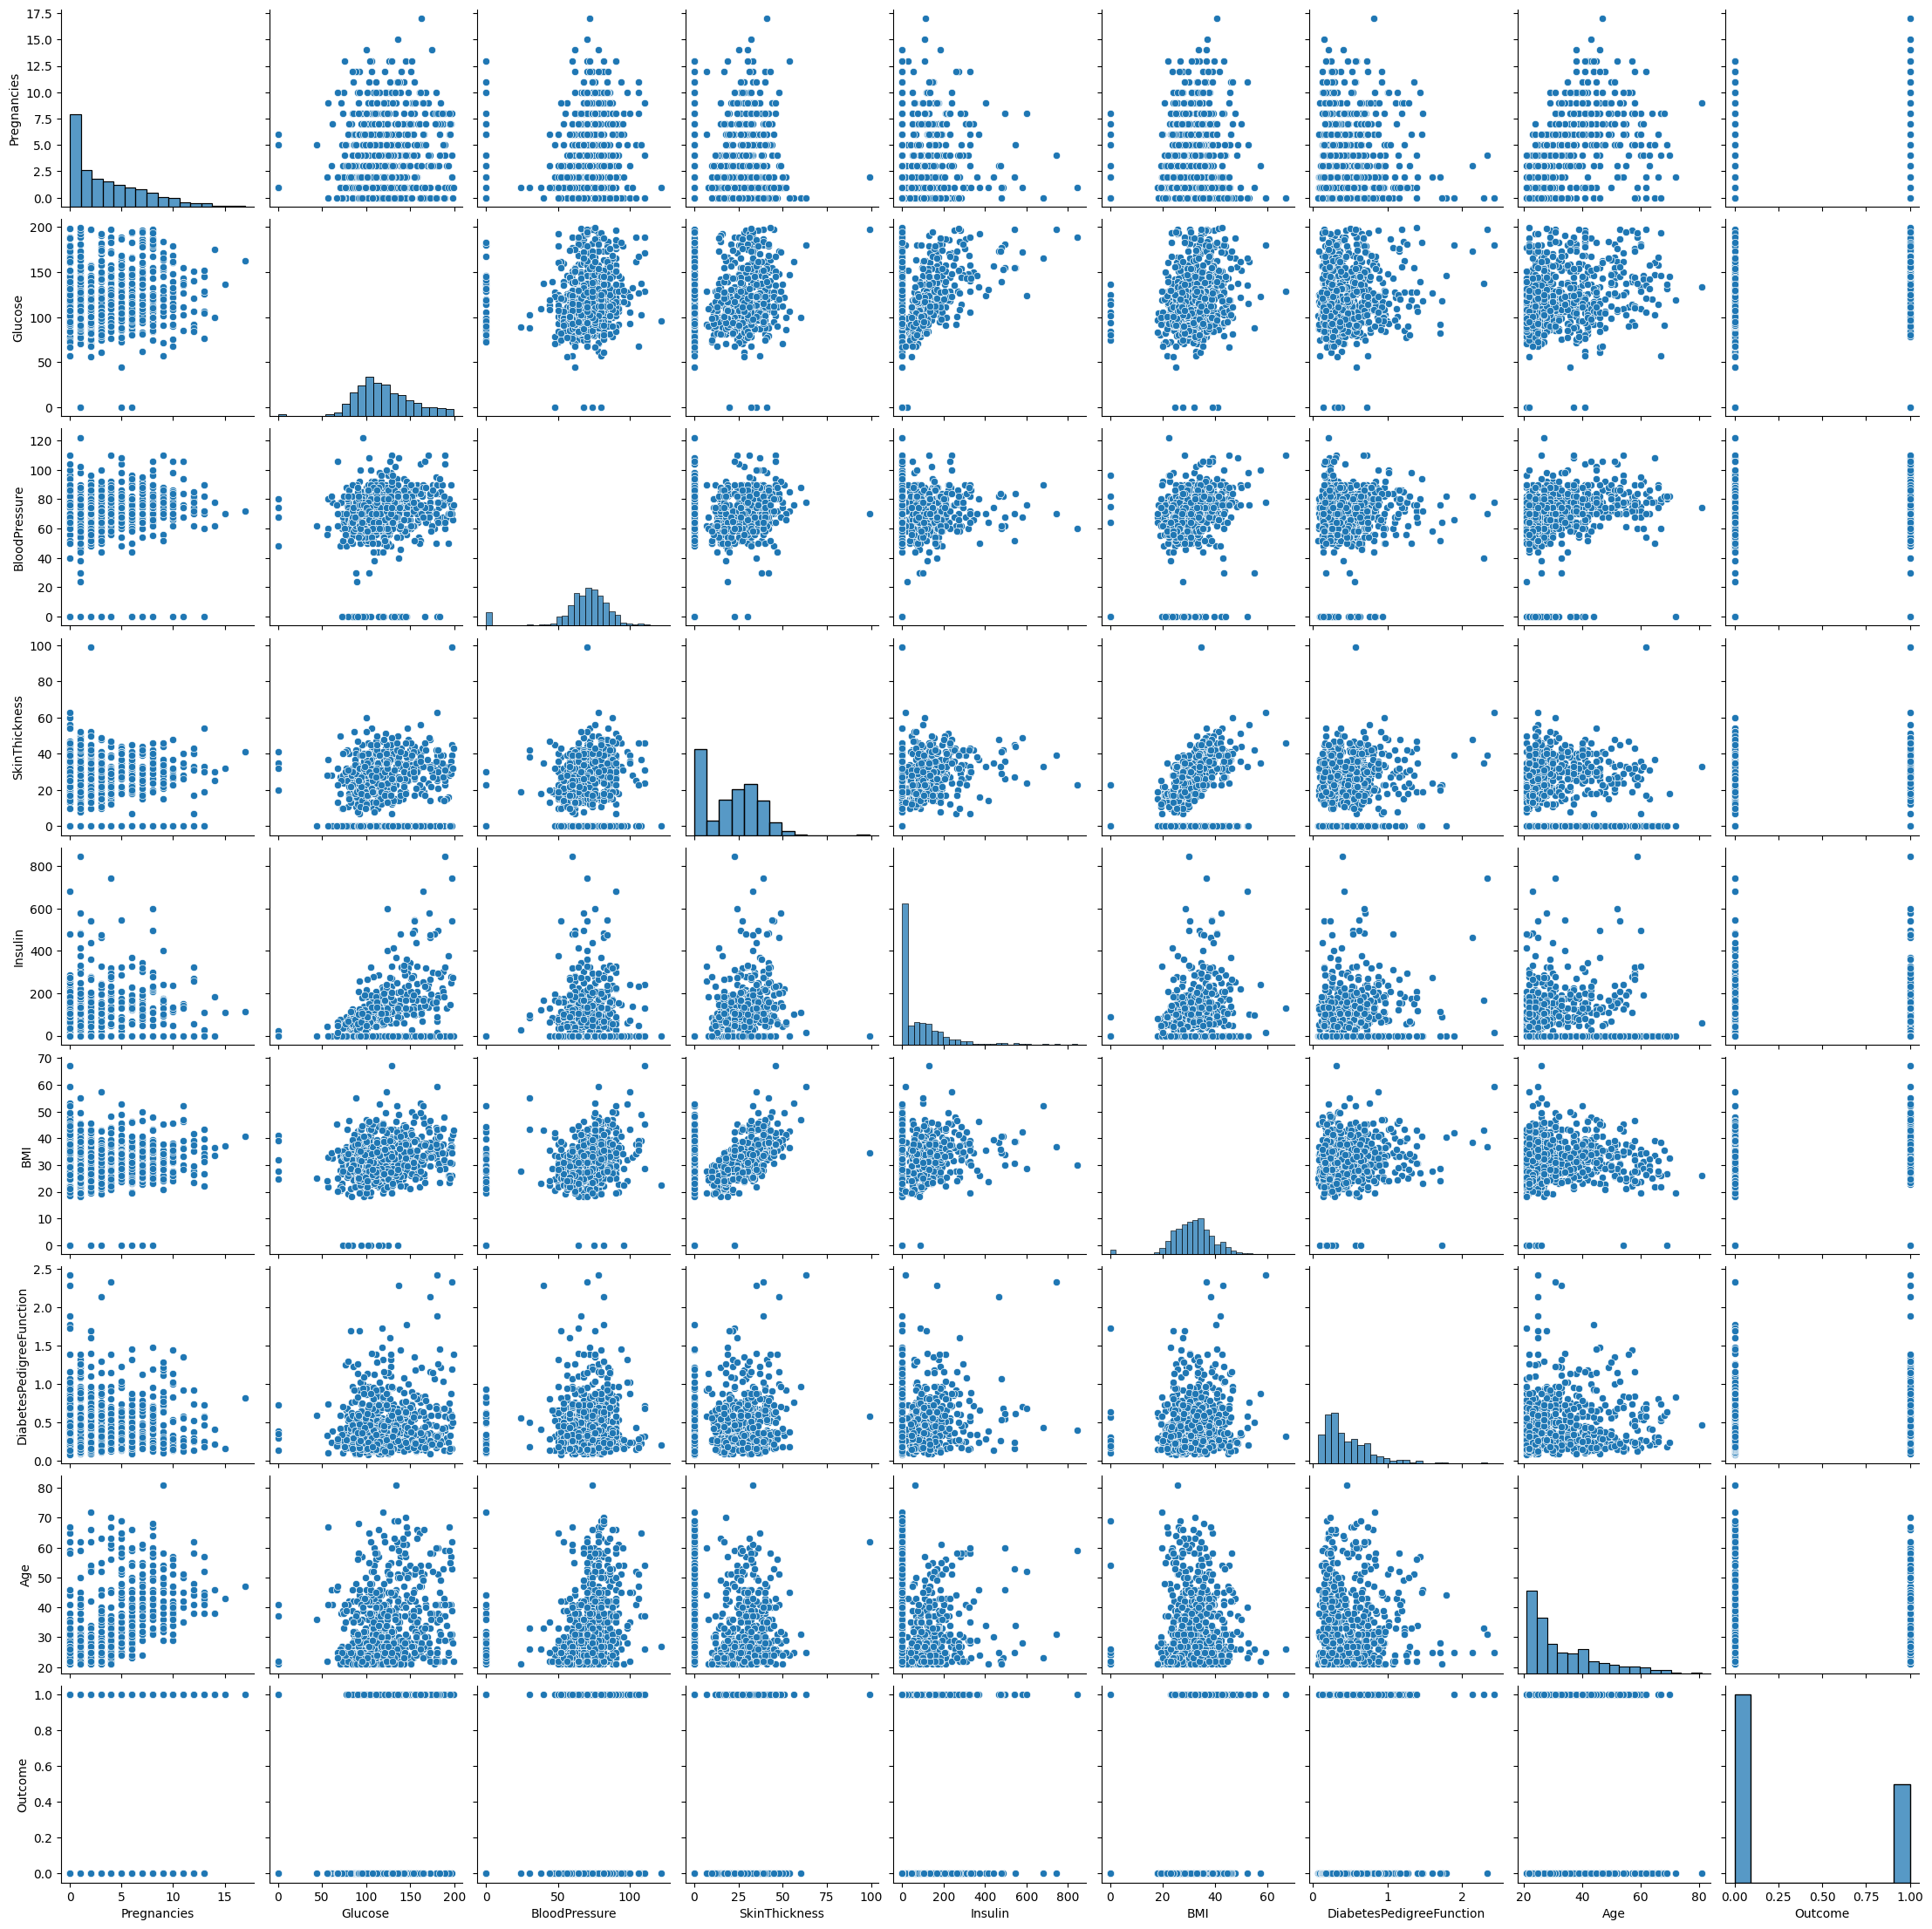

In [8]:
sns.pairplot(df)

## 3. SKLearn Regression Model (15 points)

### 3.1 Logistic Regression
In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn`. Use 20% of the data for the testing phase, and the remaining for the training phase.

In [9]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
model_sklearn = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
predictions = model_sklearn.predict(X_test)
print('Accuracy is')
print((predictions == y_test).sum() / len(y_test))

Accuracy is
0.7246376811594203


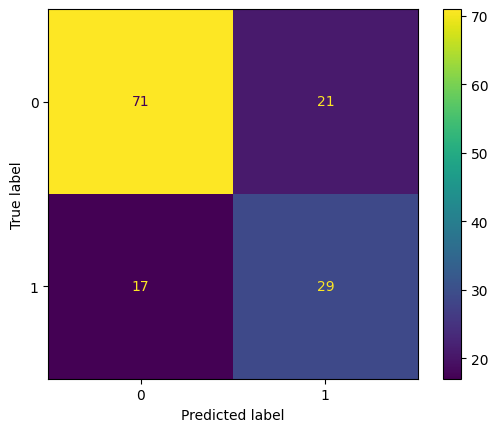

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=model_sklearn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_sklearn.classes_)
disp.plot()
plt.show()

## 4. Custom Regression Model (30 points)
First, we define base model for regression model.

### 4.1 Gradient Descent Logistic Regression Model

In [14]:
## DO NOT CHANGE THE CONTENTS OF THIS CELL

from abc import ABC, abstractmethod


class BaseModel(ABC):
    def __init__(self, n_features):
        self.N = n_features
        self.beta = np.zeros((self.N+1,))

    @abstractmethod
    def fit(self, X_train, y_train):
        raise NotImplementedError('must override fit')

    @abstractmethod
    def predict(self, X_test):
        raise NotImplementedError('must override predict')

In [15]:
class GDModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    @abstractmethod
    def loss_derivative(self, X, y):
        raise NotImplementedError("must override loss derivative")

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate(
            (X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0
        for _ in range(self.max_iter):
            loss = self.loss(X_train_new, y_train)
            if abs(loss - last_loss) < self.tol:
                break
            last_loss = loss
            dl = self.loss_derivative(X_train_new, y_train) + self.momentum * momentum
            momentum = dl
            self.beta = self.beta - self.lr * dl

TODO: Imeplement the Logistic Regression model. For this class, the only things you have to change are the definitions of the following functions: `loss`, `loss_derivative`, and `predict`. 
<br>
Note: Some basic explanations about the concept of "gradient descent" will be given to you in a TA session very soon. However, completing this task doesn't necessarily depend on being familiar with that concept.

In [16]:
class GDLogisticRegression(GDModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = np.random.normal(0, 1/np.sqrt(self.N), (self.N+1))

    def loss(self, X, y):
        #TODO: return binary cross-entropty loss
        y_hat = self.predict(X, 0)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss

    def loss_derivative(self, X, y):
        #TODO: return binary cross-entropty loss derivative
        y_hat = self.predict(X, 0)
        loss_deriv = np.dot(X.T, y_hat - y)

        return loss_deriv

    def predict(self, X, i):
        #TODO: predict probability of class
        # x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        z = np.dot(X, self.beta)
        if i == 1:
          print(z)
        y_hat = 1 / (1 + np.exp(-z))
        if i == 1:
          print(y_hat)
        return y_hat

In [17]:
logistic_model_own = GDLogisticRegression(8)
logistic_model_own.fit(X_train, y_train)


<ipython-input-16-6e4dfdabdecd>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-15-938718d32d61>:24: RuntimeWarning: invalid value encountered in double_scalars
  if abs(loss - last_loss) < self.tol:
<ipython-input-16-6e4dfdabdecd>:25: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))


In [18]:
new_X = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
predicts_own = logistic_model_own.predict(new_X, 0)
predicts_own = np.where(predicts_own < 0.5, 0, 1)
print('Accuracy is')
print((predicts_own == y_test).sum() / len(y_test))

Accuracy is
0.7246376811594203


In [19]:
print(logistic_model_own.beta)

[ 2.17734086e+01  2.55058074e+00 -1.77713154e+00  4.22589072e-01
  3.77934922e-01  6.49695466e+00  9.07704475e+01  1.79721749e-01
 -6.94911534e+02]


TODO: Implement the Logistic Regression Model. This time, use Pytorch!

In [20]:
# DO NOT CHANGE THE CONTENT OF THIS CELL

import torch

class GDTorchModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, init_lr=0.0001):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.init_lr = init_lr
        self.optimizer = None
        self.scheduler = None

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    def fit(self, X_train, Y_train):
        for _ in range(self.max_iter):
            loss = self.loss(X_train, Y_train)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            self.scheduler.step(loss)

Note: Just change the definitions of `loss` and `predict`.

In [21]:


class GDTorchLogisticRegression(GDTorchModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = torch.randn(self.N+1, requires_grad=True)
        self.optimizer = torch.optim.Adam([self.beta], lr=0.01)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=1000, factor=0.5)

    def loss(self, X, y):
        #TODO: return binary cross entropty loss using torch.nn.BCELoss
        bceloss = torch.nn.BCELoss()
        y_pred = self.predict(X)
        loss = bceloss(y_pred.float(), y.float())
        return loss

    def predict(self, X):
        #TODO: predict probability of class
        # x = torch.add_intercept(X)
        logits = torch.matmul(X, self.beta)
        prob = torch.sigmoid(logits)
        return prob

TODO: Predict the "Outcome" for the testing samples using all of the models (the one you trained using `sklearn` and the other ones for which you used your own code).

In [22]:
model_torch = GDTorchLogisticRegression(8)
X_train_new = np.concatenate([X_train, np.ones((X_train.shape[0], 1))], axis=1)

model_torch.fit(torch.from_numpy(X_train_new).float(), torch.from_numpy(y_train.to_numpy()))


# predictions = model_sklearn.predict(X_test)


In [98]:
X_test_new = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
predicts_torch = model_torch.predict(torch.from_numpy(X_test_new).float())
predicts_torch = np.where(predicts_torch < 0.5, 0, 1)
print(predicts_torch)
print('Accuracy is')
print((predicts_torch == y_test).sum() / len(y_test))


[1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1]
Accuracy is
0.7246376811594203


# Evaluation (20 points)

TODO: Calculate `precision`, `recall`, and `f1-score`, and the `confusion_matrix` using your own code. Do this for the predictions given by both of the models.

In [24]:
class classification_full_report():

    def __init__(self, y_true, y_pred):
        '''
        Parameters:
            y_true : 1d array-like, or label indicator array
                    Ground truth (correct) target values.
            y_pred : 1d array-like, or label indicator array
                    Estimated targets as returned by a classifier.

        '''
        self.y_true = y_true
        self.y_pred = y_pred
    
    def f1_score(self):
        '''
        Returns:
            f1: the f1-score calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        # calculate f1 for each class
        classes = np.unique(self.y_true)
        scores = []
        for c in classes:
          tp = np.sum((self.y_true == c) & (self.y_pred == c))
          fp = np.sum((self.y_true != c) & (self.y_pred == c))
          fn = np.sum((self.y_true == c) & (self.y_pred != c))
          precision = tp / (tp + fp)
          recall = tp / (tp + fn)
          f1 = 2 * (precision * recall) / (precision + recall)
          scores.append(f1)

        # calculate macro-average f1
        return sum(scores) / len(scores)

    def precision(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        # calculate precision for each class
        classes = np.unique(self.y_true)
        scores = []
        for c in classes:
          tp = np.sum((self.y_true == c) & (self.y_pred == c))
          fp = np.sum((self.y_true != c) & (self.y_pred == c))
          precision = tp / (tp + fp)
          scores.append(precision)

        # calculate macro-average precision
        return sum(scores) / len(scores)

    def recall(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        # calculate recall for each class
        classes = np.unique(self.y_true)
        scores = []
        for c in classes:
          tp = np.sum((self.y_true == c) & (self.y_pred == c))
          fn = np.sum((self.y_true == c) & (self.y_pred != c))
          recall = tp / (tp + fn)
          scores.append(recall)

        # calculate macro-average recall
        return sum(scores) / len(scores)

    def confusion_matrix(self):
        '''
        Returns:
            precision: the confusion matrix calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        # calculate confusion matrix
        classes = np.unique(self.y_true)
        cm = np.zeros((len(classes), len(classes)))
        for i, c1 in enumerate(classes):
          for j, c2 in enumerate(classes):
            cm[i, j] = np.sum((self.y_true == c1) & (self.y_pred == c2))

        return cm

# Finding the right Threshold (15 points)

TODO: Plot the "Precision-Recall Curve".

In [25]:
new = classification_full_report(y_test, predictions)
print(new.f1_score())
print(new.precision())
print(new.recall())
print(new.confusion_matrix())



0.6965277777777777
0.6934090909090909
0.7010869565217391
[[71. 21.]
 [17. 29.]]


In [26]:
class_predicts_own =  classification_full_report(y_test, predicts_own)
print(class_predicts_own.f1_score())
print(class_predicts_own.precision())
print(class_predicts_own.recall())
print(class_predicts_own.confusion_matrix())

0.6748511904761905
0.6876315789473684
0.6684782608695652
[[77. 15.]
 [23. 23.]]


In [27]:
class_predicts_torch = classification_full_report(y_test, predicts_torch)
print(class_predicts_torch.f1_score())
print(class_predicts_torch.precision())
print(class_predicts_torch.recall())
print(class_predicts_torch.confusion_matrix())

0.7020454545454546
0.6977513227513228
0.7119565217391304
[[69. 23.]
 [15. 31.]]


In [28]:
# SKLearn
model_sklearn = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions = model_sklearn.predict(X_test)
precisions_sklearn = []
recalls_sklearn = []
for i in range(100):
  new_predicts = np.where(predictions < float(i / 100), 0, 1)
  report_class = classification_full_report(y_test, new_predicts)
  precision = report_class.precision()
  recall = report_class.recall()
  precisions_sklearn.append(precision)
  recalls_sklearn.append(recall)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-24-0e8a873f2b9e>:50: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [ ]:
recalls_sklearn

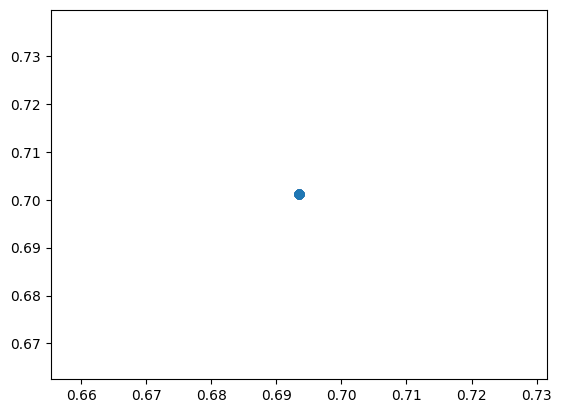

In [30]:
import matplotlib.pyplot as plt

plt.plot(precisions_sklearn, recalls_sklearn, 'o')
plt.show()

In [31]:
# My Own Code
logistic_model_own = GDLogisticRegression(8)
logistic_model_own.fit(X_train, y_train)

new_X = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
predicts_own = logistic_model_own.predict(new_X, 0)


<ipython-input-16-6e4dfdabdecd>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-16-6e4dfdabdecd>:25: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))
<ipython-input-15-938718d32d61>:24: RuntimeWarning: invalid value encountered in double_scalars
  if abs(loss - last_loss) < self.tol:


In [32]:
precisions_own = []
recalls_own = []
for i in range(100):
  new_predicts = np.where(predicts_own < float(i / 100), 0, 1)
  report_class = classification_full_report(y_test, new_predicts)
  precision = report_class.precision()
  recall = report_class.recall()
  precisions_own.append(precision)
  recalls_own.append(recall)


<ipython-input-24-0e8a873f2b9e>:50: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [33]:
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1])

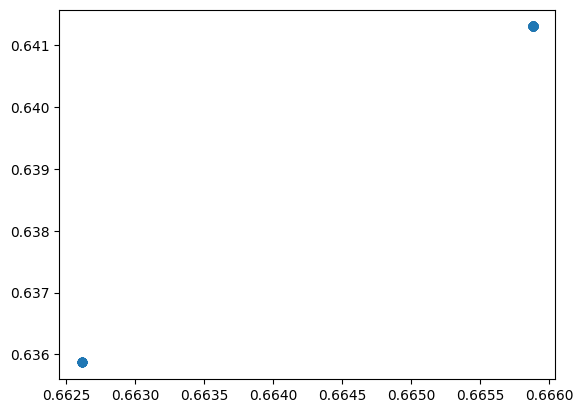

In [34]:
import matplotlib.pyplot as plt

plt.plot(precisions_own, recalls_own, 'o')
plt.show()

In [35]:
# Torch
model_torch = GDTorchLogisticRegression(8)
X_train_new = np.concatenate([X_train, np.ones((X_train.shape[0], 1))], axis=1)

model_torch.fit(torch.from_numpy(X_train_new).float(), torch.from_numpy(y_train.to_numpy()))


In [36]:
X_test_new = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
predicts_torch = model_torch.predict(torch.from_numpy(X_test_new).float())


In [37]:
precisions_torch = []
recalls_torch = []
for i in range(100):
  new_predicts = np.where(predicts_torch < float(i / 100), 0, 1)
  report_class = classification_full_report(y_test, new_predicts)
  precision = report_class.precision()
  recall = report_class.recall()
  precisions_torch.append(precision)
  recalls_torch.append(recall)


<ipython-input-24-0e8a873f2b9e>:50: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


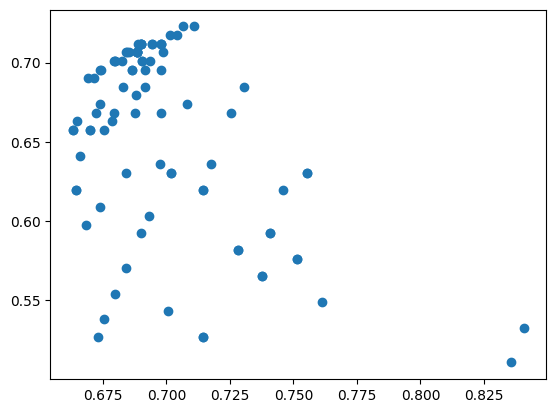

In [38]:
import matplotlib.pyplot as plt

plt.plot(precisions_torch, recalls_torch, 'o')
plt.show()

TODO: Based on the above curve, calculate the threshold minimizing the absolute difference between precision and recall.

In [46]:
# SKLearn
print(np.argmin(np.abs(np.array(precisions_sklearn[1:]) - np.array(recalls_sklearn[1:]))))
print(np.min(np.abs(np.array(precisions_sklearn[1:]) - np.array(recalls_sklearn[1:]))))

0
0.007677865612648271


In [48]:
# Own
print(np.argmin(np.abs(np.array(precisions_own[1:]) - np.array(recalls_own[1:]))))
print(np.min(np.abs(np.array(precisions_own[1:]) - np.array(recalls_own[1:]))))

16
0.024576373394440076


In [54]:
# Torch
print(np.argmin(np.abs(np.array(precisions_torch[1:]) - np.array(recalls_torch[1:]))))
print(np.min(np.abs(np.array(precisions_torch[1:]) - np.array(recalls_torch[1:]))))

91
nan


I want to use the ready functions of sklearn

In [75]:
# SKLearn
from sklearn.metrics import precision_recall_curve
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, predictions)

In [76]:
print(thresholds_1)

[0 1]


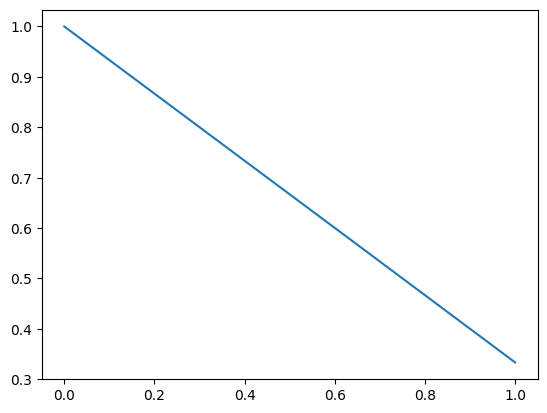

In [77]:
plt.plot(recall_1, precision_1)
plt.show()

In [78]:
# My own code
from sklearn.metrics import precision_recall_curve
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, predicts_own)

In [79]:
print(thresholds_2)

[6.86330553e-200 4.31687334e-177 1.78438084e-140 3.55550262e-117
 2.83965882e-107 8.01913437e-104 1.42566770e-097 4.75786969e-061
 1.99289686e-060 5.22792815e-060 4.29234385e-054 5.32466880e-054
 1.28845002e-046 1.73504930e-041 3.42517555e-039 2.37517414e-036
 1.50668819e-033 2.12032716e-028 2.44352148e-028 8.31560208e-028
 2.03341691e-026 3.36881668e-020 1.69020578e-017 4.58770940e-017
 1.12109314e-014 3.81053325e-013 1.83944056e-012 1.64058991e-011
 3.24653473e-011 2.99729272e-008 1.61789570e-005 9.44922172e-004
 1.19612463e-003 1.42251611e-003 1.63839681e-001 9.99812597e-001
 9.99893459e-001 9.99999991e-001 9.99999997e-001 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000]


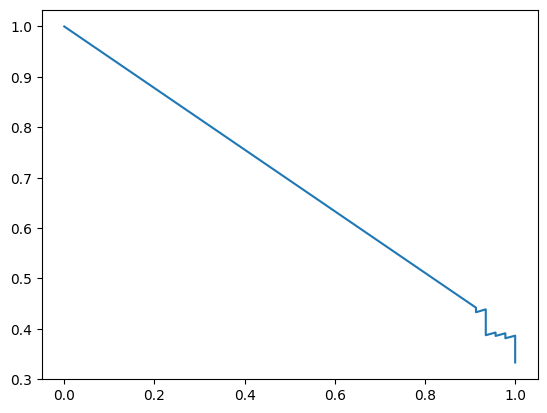

In [80]:
plt.plot(recall_2, precision_2)
plt.show()

In [81]:
# Torch
from sklearn.metrics import precision_recall_curve
precision_3, recall_3, thresholds_3 = precision_recall_curve(y_test, predicts_torch.detach().numpy())

In [82]:
print(thresholds_3)

[0.0019055  0.0036635  0.00379946 0.00460585 0.00598805 0.01471635
 0.0187705  0.0222412  0.02503753 0.02652821 0.03092113 0.03822107
 0.03823364 0.04000181 0.0432305  0.04630912 0.04735071 0.05672939
 0.05966786 0.06796013 0.06913855 0.07017764 0.07694384 0.08065164
 0.08502389 0.08598129 0.08884407 0.09566954 0.11103479 0.11185157
 0.11238325 0.11372807 0.11373763 0.11550742 0.11749759 0.12682107
 0.12926501 0.12955682 0.13035806 0.13098076 0.13163747 0.1397997
 0.14155161 0.15402265 0.15962009 0.16249149 0.16497459 0.16529888
 0.1755574  0.17669886 0.18090738 0.20061272 0.22195847 0.22301188
 0.22652622 0.23840514 0.23845008 0.24140641 0.24204567 0.24591589
 0.24786107 0.24985197 0.25025696 0.2532422  0.27291876 0.28543577
 0.29521364 0.29701215 0.29993656 0.3047365  0.3059877  0.31035298
 0.32333335 0.33045936 0.34937295 0.38594088 0.3862542  0.3959578
 0.39866844 0.40337542 0.4559101  0.4688868  0.46989653 0.47901717
 0.5080438  0.5102043  0.52543396 0.52917576 0.53322965 0.536849

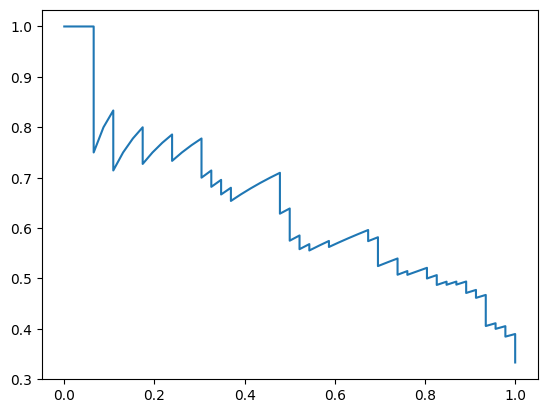

In [83]:
plt.plot(recall_3, precision_3)
plt.show()

minimize the threhshold

In [93]:
# Sklearn
argmin = np.argmin(np.abs(recall_1 - precision_1))
recall = recall_1[argmin]
precision = precision_1[argmin]
threshold = thresholds_1[argmin]
print('recall is : ' + str(recall))
print('precision is : ' + str(precision))
print('threshold is : ' + str(threshold))

recall is : 0.6304347826086957
precision is : 0.58
threshold is : 1


In [94]:
# Own
argmin = np.argmin(np.abs(recall_2- precision_2))
recall = recall_2[argmin]
precision = precision_2[argmin]
threshold = thresholds_2[argmin]

print('recall is : ' + str(recall))
print('precision is : ' + str(precision))
print('threshold is : ' + str(threshold))

recall is : 0.9130434782608695
precision is : 0.4421052631578947
threshold is : 1.0


In [95]:
# Torch
argmin = np.argmin(np.abs(recall_3 - precision_3))
recall = recall_3[argmin]
precision = precision_3[argmin]
threshold = thresholds_3[argmin]

print('recall is : ' + str(recall))
print('precision is : ' + str(precision))
print('threshold is : ' + str(threshold))

recall is : 0.5652173913043478
precision is : 0.5652173913043478
threshold is : 0.5528549


# Kaggle Competition

Link: https://www.kaggle.com/t/1013891ffec9479dadd5023e56c04f30